This notebook to perform Business Decision Research, the dataset is taken from DQLab API.

### Import Dataset

In [1]:
import pandas as pd

data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


As we see above, the dataset is messy in very unclear, especially the first and last transaction columns. Then we might want to take a look at the dataset's datatype, and number of instances.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


There are 100000 Non-null value, in other word, we might no need to worry about missing value. The first thing we might to consider is to change the first and last transaction data type into date time using pandas function.

In [3]:
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin='1970-01-01')
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


Next, we want to define customer's churn.

In [4]:
max(data['Last_Transaction'])

Timestamp('2019-02-01 23:57:57.286000013')

In [15]:
data.loc[data['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,First_Year,Last_Year,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,5. > 10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,5. > 10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. > 10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,5. > 10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,5. > 10,5. >1.000.000 - 2.500.000,3


We might want to get rid of unwanted column, such as 'no' and 'Row_Num' since both of the don't give us any information.

In [6]:
data = data.drop('no', axis=1)
data = data.drop('Row_Num', axis=1)

Now, we have clearer datasets to work with. Next step that we want to do is to see the customer acquisition in year.

### Data Visualization

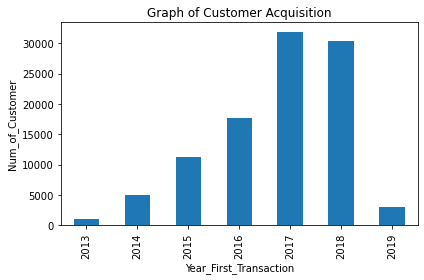

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data['First_Year'] = data['First_Transaction'].dt.year
data['Last_Year'] = data['Last_Transaction'].dt.year

dt_year = data.groupby(['First_Year'])['Customer_ID'].count()
dt_year.plot(x='First_Year', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The customer acquisition is gradually increase from 2013, and reached its peak on 2017, But drop in 2019, there are several factor causing this condition:

1. The data from 2019 is not as many as previous year
2. The business' strategy is not working anymore, since we se that 2018 has slight decrease.

We still cannot come with conclusion yet, we might want to take a look at another graphs. such as number of transaction each year.

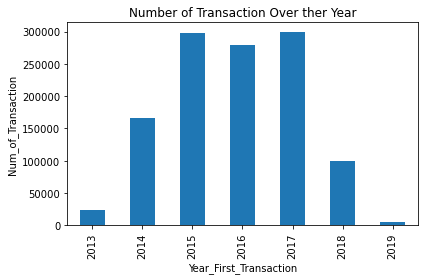

In [8]:
dt_year = data.groupby(['First_Year'])['Count_Transaction'].sum()
dt_year.plot(x='First_Year', y='Count_Transaction', kind='bar', title='Number of Transaction Over ther Year')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

There are some interesting facts to take a look at  2015, 2016. The number of customer acquisition in 2016 is higher that 2015, but the number of transaction of 2016 is less than 2015, hypothetically we come up with several conclusion based on 2 data:

1. Number of promotion happening in 2015 is variative than 2016
2. People is in need of many things

If the business goals is the number of transaction happening, the graph shows that the same strategy is not effective in 2018, but if it is not, than we might not want to consider this.

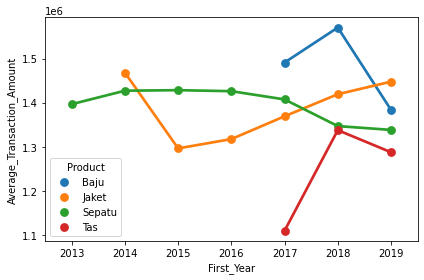

In [9]:
sns.pointplot(data = data.groupby(['Product', 'First_Year']).mean().reset_index(), 
              x='First_Year',  y='Average_Transaction_Amount',  hue='Product')
plt.tight_layout()
plt.show()

Graph above shows the average number of transaction grouped by product type.

In [10]:
dt_piv = data.pivot_table(index='is_churn', columns='Product', values='Customer_ID', aggfunc='count', fill_value=0)
dt_piv

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


Jacket is the item that has most churn propotion

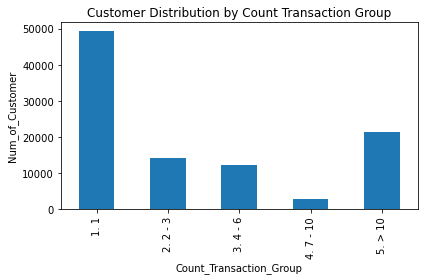

In [11]:
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. > 10'
    return val

data['Count_Transaction_Group'] = data.apply(func, axis=1)

df_year = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Graph above shows the distibution of transaction group that has been labelled based on number of transaction:
1. 0-1 
2. 2-3
3. 4-6
4. 7-10
5. more than 10

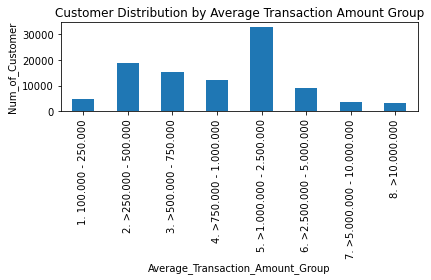

In [12]:
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val

data['Average_Transaction_Amount_Group'] = data.apply(f, axis=1)

df_year = data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The next thing is we want to create machine learning model, to help determining the business decision of the company. But we need to set up some important feature:

1. Yearspan from last transaction / Year difference
2. Average transaction amount
3. Number of transaction

Using those 3 features, we will try to classify whether the customer is churn, or not. But, before we want to predict the customer churn, we want to change the value of the churn, where 1 equal True, and 0 equal False

In [25]:
data['Year_Diff'] = data['Last_Year'] - data['First_Year']

from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
data['is_churn'] = oe.fit_transform(data['is_churn'])
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,First_Year,Last_Year,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,0,2016,2018,5. > 10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,0,2014,2018,5. > 10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019,5. > 10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,0,2017,2019,5. > 10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,0,2015,2018,5. > 10,5. >1.000.000 - 2.500.000,3


In [23]:
data['is_churn'].value_counts()

1    66569
0    33431
Name: is_churn, dtype: int64

In [26]:
df = data[['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff', 'is_churn']]
df.head()

,Average_Transaction_Amount,Count_Transaction,Year_Diff,is_churn
0,1467681,22,2,0
1,1269337,41,4,0
2,310915,30,2,0
3,722632,27,2,0
4,1775036,25,3,0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()
gnb = GaussianNB()
rfc = RandomForestClassifier()
tree = DecisionTreeClassifier()
sgd = SGDClassifier()
knc = KNeighborsClassifier()

In [37]:
#Logistic Regression

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5000896314227697

In [39]:
#GaussianNB

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5247352979197345

In [40]:
#DecisionTree

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6082240258384823

In [42]:
#SGDClassifier

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5000896314227697

In [43]:
#RandomForest

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6219999561015377

In [44]:
#KNeighbors

knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5196323067100239

In [45]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
roc_auc_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:48:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6909105636743131

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV 

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgbc, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
clf_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.3min finished


[17:02:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [52]:
y_pred = clf_xgb.best_estimator_.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6893192588043197

We can see, XGBClassifier give better result compares to othe model, but this result may be sub-optimal due to our tools and hardware limitations

Othe project can be see on https://github.com/DanielAdif